In [1]:
from relatio import Preprocessor


p = Preprocessor(
    spacy_model = "en_core_web_lg",
    remove_punctuation = True,
    remove_digits = True,
    lowercase = True,
    lemmatize = True,
    remove_chars = ["\"",'-',"^",".","?","!",";","(",")",",",":","\'","+","&","|","/","{","}",
                    "~","_","`","[","]",">","<","=","*","%","$","@","#","’"],
    stop_words = [],
    n_process = -1,
    batch_size = 100)


/home/semipro321/anaconda3/envs/relatio_env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from relatio import load_data
import pandas as pd
df = load_data(dataset = "trump_tweet_archive", content = "raw")
df = pd.read_csv("/home/semipro321/OneDrive/School/McGill/Research Projects/Essay/Data/essay11/Processed/essays_corrected.csv")
df =  df[["ID", "corrected"]]
df.rename(columns = {"ID": "id", "corrected": "doc"}, inplace = True)


In [3]:
df = p.split_into_sentences(
    df, output_path = None, progress_bar = True
)

Splitting into sentences...


100%|██████████| 10509/10509 [01:25<00:00, 123.57it/s]


In [4]:
from relatio import SRL

SRL = SRL(
    path = "https://storage.googleapis.com/allennlp-public-models/openie-model.2020.03.26.tar.gz",
    batch_size = 10,
    cuda_device = -1
)

srl_res = SRL(df['sentence'][0:1000], progress_bar=True)

from relatio import extract_roles

roles, sentence_index = extract_roles(
    srl_res, 
    used_roles = ["ARG0","B-V","B-ARGM-NEG","B-ARGM-MOD","ARG1","ARG2"],
    only_triplets = True,
    progress_bar = True
)

for d in roles[0:20]: print(d)

Running SRL...


100%|██████████| 100/100 [01:13<00:00,  1.37it/s]


Extracting semantic roles...


100%|██████████| 1000/1000 [00:00<00:00, 12977.22it/s]

{'ARG0': 'I', 'B-V': 'got', 'ARG1': 'a car for myself and The Family'}
{'ARG0': 'We', 'B-V': 'have', 'ARG1': 'a 4 - year - old son'}
{'ARG0': 'I', 'B-V': 'hope', 'ARG1': 'To become a Teacher and in spare Time an Athlete'}
{'ARG0': 'I', 'B-V': 'TAKE', 'ARG1': 'My son', 'ARG2': 'To [ estate ] gardens'}
{'ARG0': 'we', 'B-V': 'getting', 'ARG1': 'a dog'}
{'ARG0': 'We', 'B-V': 'know', 'ARG1': 'what To Call it', 'B-ARGM-NEG': True}
{'ARG0': 'I', 'B-V': 'Taught', 'ARG1': 'my son'}
{'ARG0': 'she', 'B-V': 'has', 'ARG1': 'swum 5 times'}
{'ARG0': 'We', 'B-V': 'got', 'ARG1': 'a colour'}
{'ARG0': 'I', 'B-V': 'hope', 'ARG1': 'To Teach French and Spanish'}
{'ARG0': 'I', 'B-V': 'Teach', 'ARG1': 'French and Spanish'}
{'ARG0': 'I', 'B-V': 'hope', 'ARG1': 'To Teach at'}
{'ARG0': 'I', 'B-V': 'have', 'ARG1': 'JUST Learned That we are having another baby'}
{'ARG0': 'we', 'B-V': 'having', 'ARG1': 'another baby'}
{'ARG0': 'We', 'B-V': 'know', 'ARG1': 'what he is - a boy or a girl - we have a silver Tea set', '

In [5]:
sentence_index, roles = p.extract_svos(df['sentence'], expand_nouns = True, only_triplets = False, progress_bar = True) 
for svo in roles[0:20]: print(svo)

Extracting SVOs...


100%|██████████| 151057/151057 [02:23<00:00, 1055.85it/s]


{'ARG0': 'I', 'B-V': 'got', 'ARG1': 'a car'}
{'B-V': 'married', 'ARG1': 'I'}
{'B-V': 'called', 'ARG1': 'My wife'}
{'ARG0': 'We', 'B-V': 'have', 'ARG1': 'a 4-year-old son'}
{'ARG0': 'I', 'B-V': 'go'}
{'ARG0': 'I', 'B-V': 'go'}
{'ARG0': 'I', 'B-V': 'hope'}
{'B-V': 'become'}
{'ARG0': 'I', 'B-V': 'Live'}
{'ARG0': 'I', 'B-V': 'TAKE', 'ARG1': 'My son'}
{'ARG0': 'we', 'B-V': 'getting', 'ARG1': 'a dog'}
{'ARG0': 'We', 'B-V': 'know'}
{'B-V': 'Call', 'ARG1': 'what'}
{'B-V': 'Call', 'ARG1': 'it'}
{'ARG0': 'I', 'B-V': 'go'}
{'ARG0': 'I', 'B-V': 'Taught', 'ARG1': 'my son'}
{'B-V': 'swim'}
{'ARG0': 'she', 'B-V': 'swum'}
{'ARG0': 'We', 'B-V': 'got', 'ARG1': 'a colour Television'}
{'ARG0': 'I', 'B-V': 'hope'}


In [6]:
postproc_roles = p.process_roles(roles, 
                                 max_length = 50,
                                 progress_bar = True,
                                 output_path = '/home/semipro321/OneDrive/School/McGill/Research Projects/Essay/Code/jacob/output/postproc_roles.json')

Cleaning phrases for role ARG0...


100%|██████████| 202242/202242 [01:36<00:00, 2101.18it/s]


Cleaning phrases for role B-V...


100%|██████████| 307753/307753 [02:31<00:00, 2035.13it/s]


Cleaning phrases for role B-ARGM-MOD...


0it [00:00, ?it/s]


Cleaning phrases for role ARG1...


100%|██████████| 146264/146264 [01:13<00:00, 1978.35it/s]


Cleaning phrases for role ARG2...


0it [00:00, ?it/s]


In [7]:
known_entities = p.mine_entities(
    df['sentence'], 
    clean_entities = True, 
    progress_bar = True,
    output_path = '/home/semipro321/OneDrive/School/McGill/Research Projects/Essay/Code/jacob/output/entities.pkl'
)

for n in known_entities.most_common(20): print(n)

Mining named entities...


100%|██████████| 151057/151057 [02:29<00:00, 1012.31it/s]

('london', 1029)
('england', 686)
('spain', 581)
('australia', 405)
('france', 390)
('america', 388)
('scotland', 356)
('john', 319)
('canada', 230)
('italy', 203)
('ford', 179)
('wales', 171)
('switzerland', 171)
('french', 158)
('mum', 155)
('germany', 148)
('manchester united', 144)
('ireland', 137)
('leeds', 130)
('xxxxxxx', 130)


In [8]:
from relatio.utils import load_entities
known_entities = load_entities('/home/semipro321/OneDrive/School/McGill/Research Projects/Essay/Code/jacob/output/entities.pkl')

top_known_entities = [e[0] for e in list(known_entities.most_common(100)) if e[0] != '']

In [9]:
from relatio.narrative_models import NarrativeModel


m = NarrativeModel(
    clustering = 'kmeans',
    PCA = True,
    UMAP = True,
    roles_considered = ['ARG0', 'B-V', 'B-ARGM-NEG', 'ARG1'],
    roles_with_known_entities = ['ARG0','ARG1'],
    known_entities = top_known_entities,
    assignment_to_known_entities = 'embeddings',
    roles_with_unknown_entities = ['ARG0','ARG1'],
    threshold = 0.1
)    
             
m.fit(postproc_roles, progress_bar = True) 

Computing phrase embeddings...


100%|██████████| 6886/6886 [01:10<00:00, 98.33it/s] 


Computing phrase embeddings...


100%|██████████| 29848/29848 [05:33<00:00, 89.60it/s] 


Computing phrase embeddings...


100%|██████████| 33530/33530 [06:13<00:00, 89.84it/s] 


Dimension reduction via PCA...
PCA parameters:
{'n_components': 50, 'svd_solver': 'full'}
Dimension reduction via UMAP...
UMAP parameters:
{'n_neighbors': 15, 'n_components': 2, 'random_state': 0}


/home/semipro321/anaconda3/envs/relatio_env/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Clustering phrases into clusters...
Clustering parameters chosen in this range:
{'n_clusters': [33, 83, 167, 250, 335], 'random_state': 0}


/home/semipro321/anaconda3/envs/relatio_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/semipro321/anaconda3/envs/relatio_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/semipro321/anaconda3/envs/relatio_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/semipro321/anaconda3/envs/relatio_env/lib/python3.8/site-packages/sklearn/cluster/

The silhouette score suggests the optimal number of clusters is 335. This corresponds to index 4.
The elbow method (inertia score) suggests the optimal number of clusters is 83. This corresponds to index 1.
Labeling the clusters by the most frequent phrases...


/home/semipro321/anaconda3/envs/relatio_env/lib/python3.8/site-packages/relatio/narrative_models.py:585: RuntimeWarning: Multiple labels for cluster 61- 2 shown: [('stable', 38), ('turn', 38)]. First one is picked.
  warnings.warn(
/home/semipro321/anaconda3/envs/relatio_env/lib/python3.8/site-packages/relatio/narrative_models.py:585: RuntimeWarning: Multiple labels for cluster 58- 2 shown: [('my pupil', 16), ('pupil', 16)]. First one is picked.
  warnings.warn(
/home/semipro321/anaconda3/envs/relatio_env/lib/python3.8/site-packages/relatio/narrative_models.py:585: RuntimeWarning: Multiple labels for cluster 140- 2 shown: [('suit', 18), ('trouser', 18)]. First one is picked.
  warnings.warn(
/home/semipro321/anaconda3/envs/relatio_env/lib/python3.8/site-packages/relatio/narrative_models.py:585: RuntimeWarning: Multiple labels for cluster 157- 2 shown: [('stable', 38), ('turn', 38)]. First one is picked.
  warnings.warn(
/home/semipro321/anaconda3/envs/relatio_env/lib/python3.8/site-pac

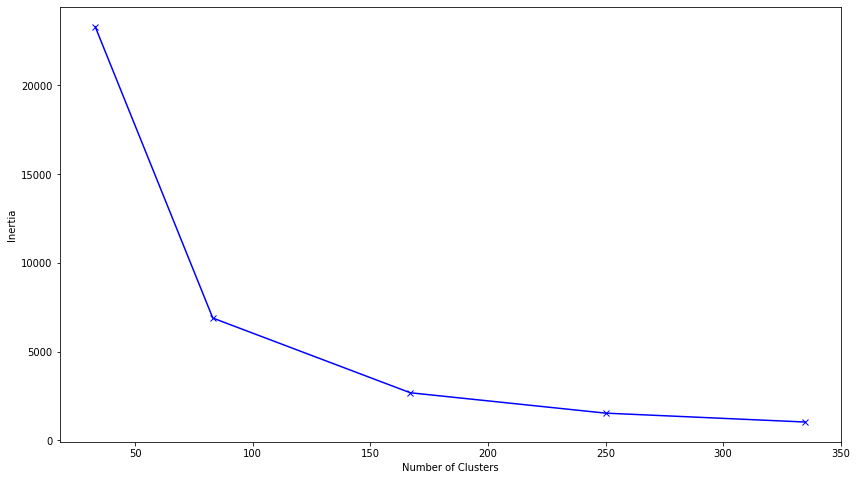

In [10]:
m.plot_selection_metric(metric = 'inertia') 


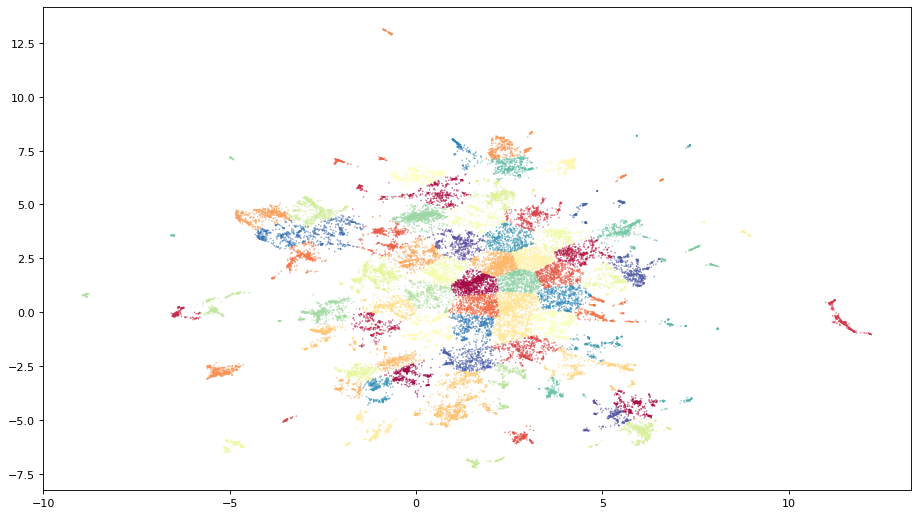

In [11]:
m.plot_clusters(path = '/home/semipro321/OneDrive/School/McGill/Research Projects/Essay/Code/jacob/output/clusters.pdf') 


In [12]:
m.clusters_to_txt(path = '/home/semipro321/OneDrive/School/McGill/Research Projects/Essay/Code/jacob/output/clusters.txt')


In [13]:
narratives = m.predict(postproc_roles, progress_bar = True)



Predicting entities for role: ARG0...
Computing phrase embeddings...


100%|██████████| 202035/202035 [1:58:03<00:00, 28.52it/s]  


Matching known entities (with embeddings distance)...
Matching unknown entities (with clustering model)...
Dimension reduction of vectors (PCA)...
Dimension reduction of vectors (UMAP)...
Assignment to clusters...

Predicting entities for role: ARG1...
Computing phrase embeddings...


100%|██████████| 143823/143823 [1:07:42<00:00, 35.40it/s]  


Matching known entities (with embeddings distance)...
Matching unknown entities (with clustering model)...
Dimension reduction of vectors (PCA)...
Dimension reduction of vectors (UMAP)...
Assignment to clusters...


In [19]:
from relatio.utils import prettify

pretty_narratives = []
for n in narratives: 
    pretty_narratives.append(prettify(n))

for i in range(20):           
    print(roles[i])
    print(postproc_roles[i])
    print(pretty_narratives[i])

{'ARG0': 'I', 'B-V': 'got', 'ARG1': 'a car'}
{'ARG0': 'i', 'B-V': 'get', 'ARG1': 'a car'}
i get a car
{'B-V': 'married', 'ARG1': 'I'}
{'B-V': 'marry', 'ARG1': 'i'}
marry i
{'B-V': 'called', 'ARG1': 'My wife'}
{'B-V': 'call', 'ARG1': 'my wife'}
call my husband
{'ARG0': 'We', 'B-V': 'have', 'ARG1': 'a 4-year-old son'}
{'ARG0': 'we', 'B-V': 'have', 'ARG1': 'a year old son'}
we have the child
{'ARG0': 'I', 'B-V': 'go'}
{'ARG0': 'i', 'B-V': 'go'}
i go
{'ARG0': 'I', 'B-V': 'go'}
{'ARG0': 'i', 'B-V': 'go'}
i go
{'ARG0': 'I', 'B-V': 'hope'}
{'ARG0': 'i', 'B-V': 'hope'}
i hope
{'B-V': 'become'}
{'B-V': 'become'}
become
{'ARG0': 'I', 'B-V': 'Live'}
{'ARG0': 'i', 'B-V': 'live'}
i live
{'ARG0': 'I', 'B-V': 'TAKE', 'ARG1': 'My son'}
{'ARG0': 'i', 'B-V': 'take', 'ARG1': 'my son'}
i take my husband
{'ARG0': 'we', 'B-V': 'getting', 'ARG1': 'a dog'}
{'ARG0': 'we', 'B-V': 'get', 'ARG1': 'a dog'}
we get a dog
{'ARG0': 'We', 'B-V': 'know'}
{'ARG0': 'we', 'B-V': 'know'}
we know
{'B-V': 'Call', 'ARG1': 'wha

In [28]:
from relatio import build_graph, draw_graph

G = build_graph(
    narratives, 
    top_n = 70, 
    prune_network = False
)

draw_graph(
    G,
    notebook = True,
    show_buttons = False,
    width="2600px",
    height="2000px",
    output_filename = '/home/semipro321/OneDrive/School/McGill/Research Projects/Essay/Code/jacob/output/network_of_narratives.html')

/home/semipro321/OneDrive/School/McGill/Research Projects/Essay/Code/jacob/output/network_of_narratives.html


In [16]:
import pickle as pk 

with open('/home/semipro321/OneDrive/School/McGill/Research Projects/Essay/Code/jacob/output/narrative_model.pkl','wb') as f:
    pk.dump(m,f)

# with open('/home/semipro321/OneDrive/School/McGill/Research Projects/Essay/Code/jacob/output/narrative_model.pkl','rb') as f:
#     m = pk.load(f)

In [21]:
import json

with open('/home/semipro321/OneDrive/School/McGill/Research Projects/Essay/Code/jacob/output/narratives.json', 'w') as f:
    json.dump(narratives, f)
